In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

Load Data

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Group Data based on stroke

In [3]:
grouped = df.groupby(['stroke'])
stroke = grouped.get_group(1)
no_stroke = grouped.get_group(0)
stroke.head()
no_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


Data Exploration

Age

In [4]:
print("Stroke age",stroke['age'].mean())
print("No Stroke age",no_stroke['age'].mean())

Stroke age 67.72819277108434
No Stroke age 41.971544949598844


Glucose

In [5]:
print("Stroke glucose",stroke['avg_glucose_level'].mean())
print("No Stroke glucose",no_stroke['avg_glucose_level'].mean())

Stroke glucose 132.54473895582328
No Stroke glucose 104.79551326887471


BMI

In [6]:
print("Stroke bmi",stroke['bmi'].mean())
print("No Stroke bmi",no_stroke['bmi'].mean())

Stroke bmi 30.471291866028707
No Stroke bmi 28.823063829787234


Categorical Variables

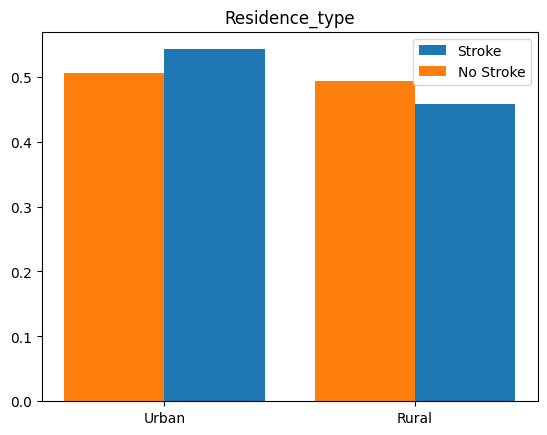

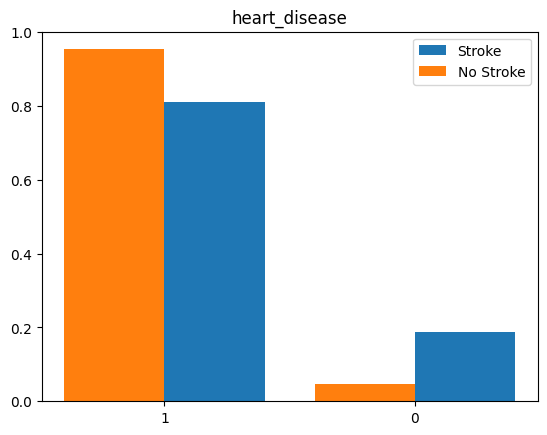

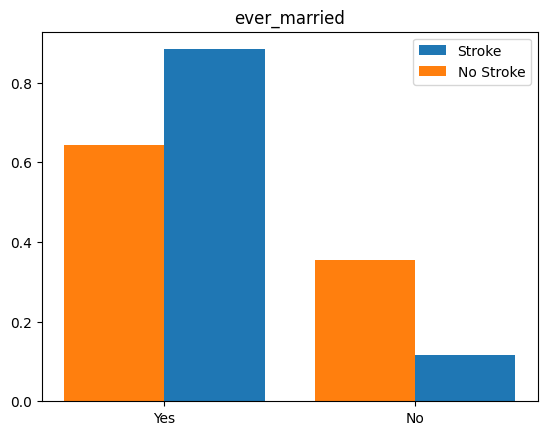

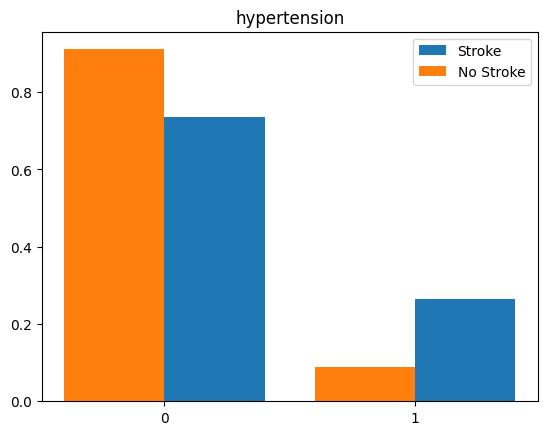

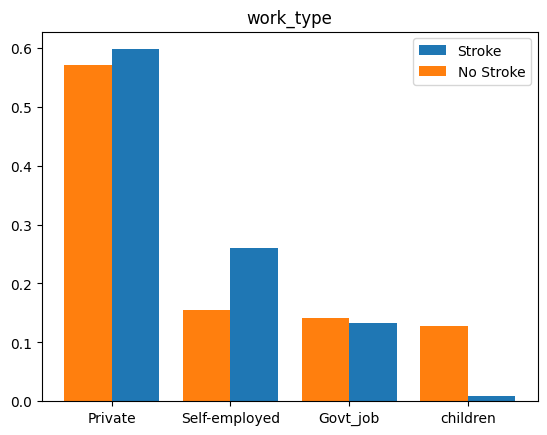

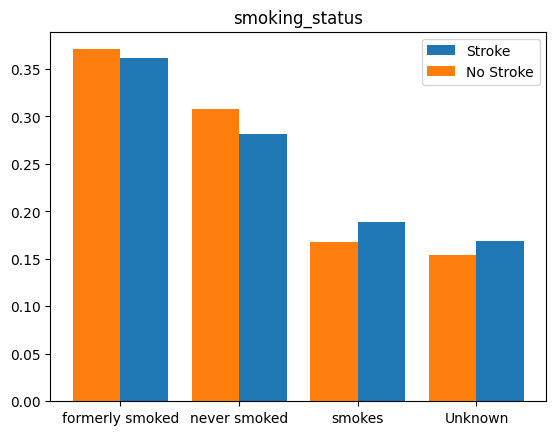

In [7]:
types = ['Residence_type', 'heart_disease', 'ever_married', 'hypertension', 'work_type', 'smoking_status']
for type in types:
    categories = stroke[type].unique()
    stroke_percentages = [stroke[type].value_counts()[i]/stroke[type].count() for i in range(len(categories))]
    no_stroke_percentages = [no_stroke[type].value_counts()[i]/no_stroke[type].count() for i in range(len(categories))]
    x_axis = np.arange(len(categories))
    plt.bar(x_axis + .2, stroke_percentages, 0.4, label="Stroke")
    plt.bar(x_axis - .2, no_stroke_percentages, 0.4, label="No Stroke")
    plt.xticks(x_axis, categories)
    plt.legend()
    plt.title(type)
    plt.show()


Converting Categorical Values to Numeric

In [8]:
df['Residence_type'].replace(['Urban', 'Rural'],[0, 1], inplace=True)
df['gender'].replace(['Male', 'Female', 'Other'], [0,1,2], inplace=True)
df['ever_married'].replace(['No', 'Yes'], [0,1], inplace=True)
df['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], [0,1,2,3,4], inplace=True)
df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], [0,1,2,3], inplace=True)

Setting N/A Bmis to different values

In [19]:
print("Median: ",df['bmi'].median())
print("Mode: ", df['bmi'].mode()[0])
print("Mean", round(df['bmi'].mean(), 1))
df['bmi'].min()
training = []
testing = []
values = np.arange(round(df['bmi'].min(), 1), round(df['bmi'].max(), 1), .5)
for i in range(len(values)):
    new_df = deepcopy(df)
    new_df['bmi'] = new_df['bmi'].replace(np.NaN, values[i])
    X = new_df.loc[:, new_df.columns != 'stroke']
    y = df['stroke']
    temp_train_accuracy = np.empty(10)
    temp_test_accuracy = np.empty(10)
    for x in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, shuffle=True)
        model = LogisticRegression(solver="liblinear", random_state=0).fit(X_train,y_train)
        predictions = model.predict(X_train)
        total_correct = np.sum(predictions == y_train)
        accuracy = total_correct / len(y_train)
        temp_train_accuracy[x] = (accuracy)

        predictions = model.predict(X_test)
        total_correct = np.sum(predictions == y_test)
        accuracy = total_correct / len(y_test)
        temp_test_accuracy[x] = (accuracy)   
    training.append(temp_train_accuracy.sum() / 10)
    testing.append(temp_test_accuracy.sum() / 10)

Median:  28.1
Mode:  28.7
Mean 28.9


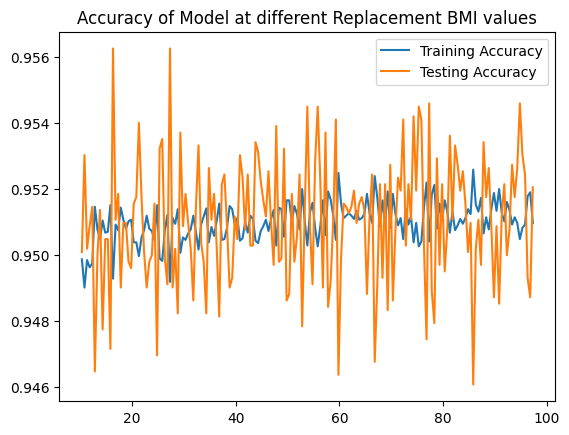

In [20]:
plt.plot(values, training, label="Training Accuracy")
plt.plot(values, testing, label="Testing Accuracy")
plt.title("Accuracy of Model at different Replacement BMI values")
plt.legend()
plt.show()

Testing Median Data 

In [10]:
median_training = []
median_testing = []
X = median_df.loc[:, median_df.columns != 'stroke']
y = df['stroke']
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, shuffle=True)
    model = LogisticRegression(solver="liblinear", random_state=0).fit(X_train,y_train)
    predictions = model.predict(X_train)
    total_correct = np.sum(predictions == y_train)
    accuracy = total_correct / len(y_train)
    median_training.append(accuracy)

    predictions = model.predict(X_test)
    total_correct = np.sum(predictions == y_test)
    accuracy = total_correct / len(y_test)
    median_testing.append(accuracy)   

NameError: name 'median_df' is not defined

Display results

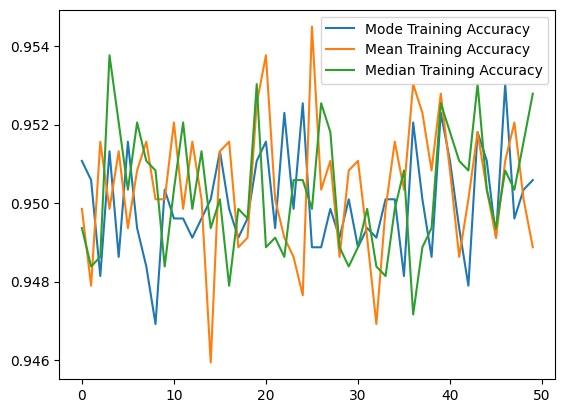

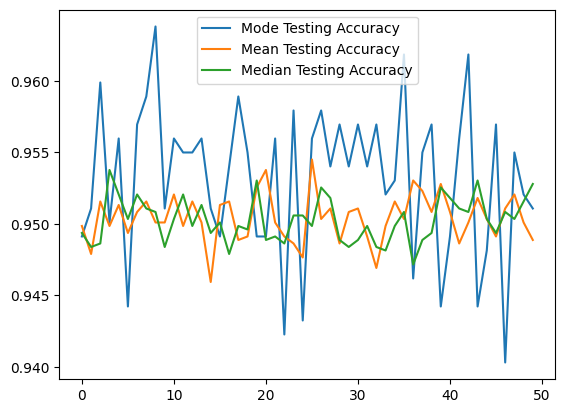

In [ ]:
x = np.arange(50)
plt.plot(x, mode_training, label="Mode Training Accuracy")
plt.plot(x, mean_training, label="Mean Training Accuracy")
plt.plot(x, median_training, label="Median Training Accuracy")
plt.legend()
plt.show()
plt.plot(x, mode_testing, label="Mode Testing Accuracy")
plt.plot(x, mean_training, label="Mean Testing Accuracy")
plt.plot(x, median_training, label="Median Testing Accuracy")
plt.legend()
plt.show()